In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

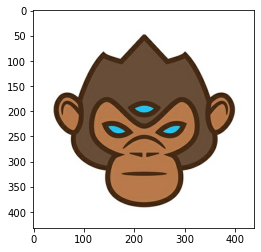

In [205]:
image_path = 'data/monke.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=3)
# image = tf.image.resize(image, size=[400, 400])
img= tf.image.convert_image_dtype(image, dtype=tf.float32)
plt.imshow(img)

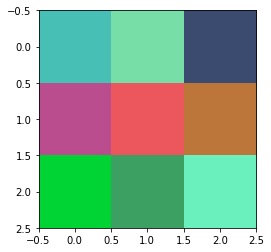

In [4]:
import numpy as np
r= np.random.randint(0,255,size=(3,3))/255
g= np.random.randint(0,255,size=(3,3))/255
b= np.random.randint(0,255,size=(3,3))/255
plt.imshow(np.dstack((r,g,b)))

In [2]:
sobel=[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
edge_detect=[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
sharpen=[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]

In [5]:
kernel= tf.constant(np.array([sobel,edge_detect,sharpen]),dtype='float32')
kernel

<tf.Tensor: shape=(3, 3, 3), dtype=float32, numpy=
array([[[-1., -2., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  2.,  1.]],

       [[-1., -1., -1.],
        [-1.,  8., -1.],
        [-1., -1., -1.]],

       [[ 0., -1.,  0.],
        [-1.,  5., -1.],
        [ 0., -1.,  0.]]], dtype=float32)>

In [112]:
img.shape

TensorShape([125, 299, 3])

In [209]:
# [filter_height, filter_width, in_channels, out_channels]
kernel.shape

TensorShape([3, 3, 3])

In [206]:
# [batch, in_height, in_width, in_channels]
img2 = tf.expand_dims(img, axis=0)
img2.shape

TensorShape([1, 432, 439, 3])

In [117]:
# kernel = tf.cast(kernel, dtype=tf.float32)

In [210]:
kernel= tf.reshape(kernel, [*kernel.shape,1])
kernel.shape

TensorShape([3, 3, 3, 1])

In [211]:
con_image= tf.nn.conv2d(input= img2,
            filters= kernel,
            strides=1,
             padding='SAME'
            )

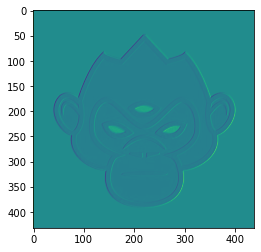

In [212]:
plt.imshow(con_image[0].numpy())

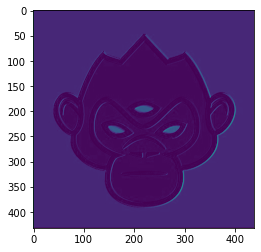

In [213]:
plt.imshow(tf.nn.relu(con_image[0].numpy()))

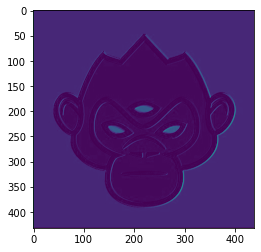

In [214]:
plt.imshow(tf.squeeze(tf.nn.relu(con_image[0].numpy())))

In [215]:
i= con_image
image_condense = tf.nn.pool(
    input=i, # image in the Detect step above
    window_shape=(2, 2),
    pooling_type='MAX',
    # we'll see what these do in the next lesson!
    strides=(2, 2),
    padding='SAME',
)

Text(0.5, 1.0, 'relu in last after pooling')

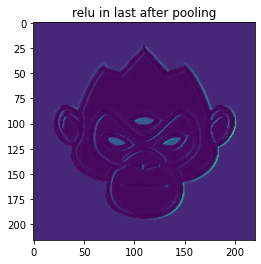

In [216]:
plt.imshow(tf.nn.relu(image_condense[0]))
plt.title('relu in last after pooling')

Text(0.5, 1.0, 'relu before pooling')

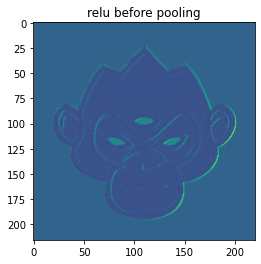

In [217]:
plt.imshow(image_condense[0])
plt.title('relu before pooling')

Text(0.5, 1.0, 'No relu')

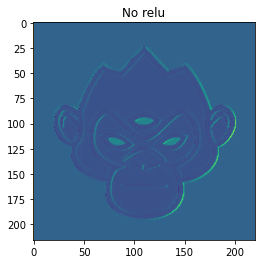

In [218]:
plt.imshow(image_condense[0])
plt.title('No relu')

## Changing window size

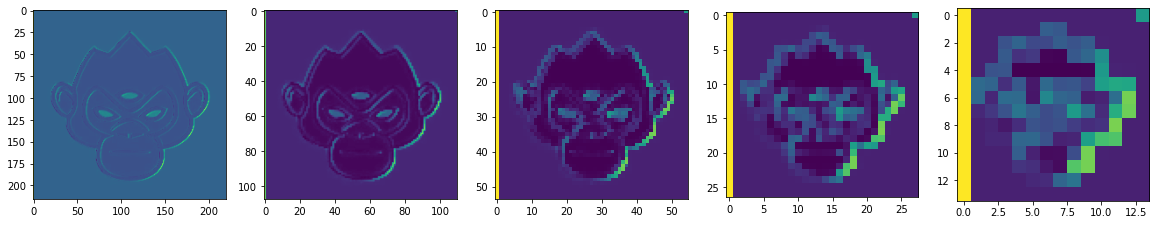

In [221]:
i= con_image
images=[]
for j in range(5):    
    i = tf.nn.pool(
        input=i, # image in the Detect step above
        window_shape=(2, 2),
        pooling_type='MAX',
        # we'll see what these do in the next lesson!
        strides=(2, 2),
        padding='SAME',
    )
    images.append(i[0])
fig,ax= plt.subplots(nrows=1,ncols=5,figsize=(20,10))
ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[2].imshow(images[2])
ax[3].imshow(images[3])
ax[4].imshow(images[4])

In [224]:
# pooling reduce the pixels
for i in range(5):
    print(images[i].shape)

(216, 220, 1)
(108, 110, 1)
(54, 55, 1)
(27, 28, 1)
(14, 14, 1)


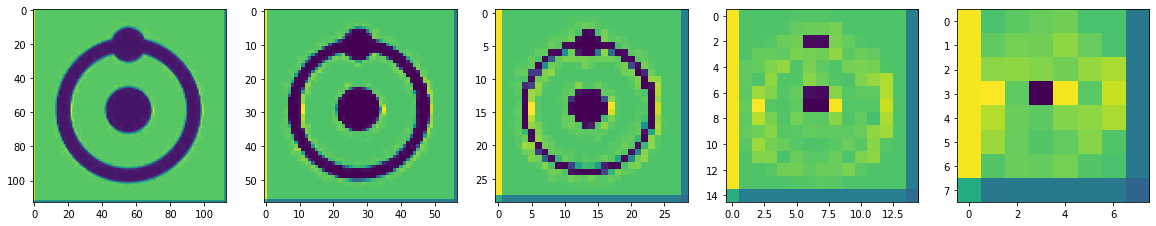

In [5]:
import numpy as np
image_path = 'data/hydrogen.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=3)
# image = tf.image.resize(image, size=[400, 400])
img= tf.image.convert_image_dtype(image, dtype=tf.float32)

img2 = tf.expand_dims(img, axis=0)
sobel=[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
edge_detect=[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
sharpen=[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
k = tf.constant([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2],
],dtype='float32')
kernel= tf.constant(np.array([edge_detect,k,k]),dtype='float32')
kernel
img2.shape
kernel= tf.reshape(kernel, [*kernel.shape,1])
kernel.shape
con_image= tf.nn.conv2d(input= img2,
            filters= kernel,
            strides=1,
             padding='SAME'
            )

i= con_image
images=[]
for j in range(5):    
    i = tf.nn.pool(
        input=i, # image in the Detect step above
        window_shape=(2, 2),
        pooling_type='MAX',
        # we'll see what these do in the next lesson!
        strides=(2, 2),
        padding='SAME',
    )
    images.append(i[0])
fig,ax= plt.subplots(nrows=1,ncols=5,figsize=(20,10))
ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[2].imshow(images[2])
ax[3].imshow(images[3])
ax[4].imshow(images[4])

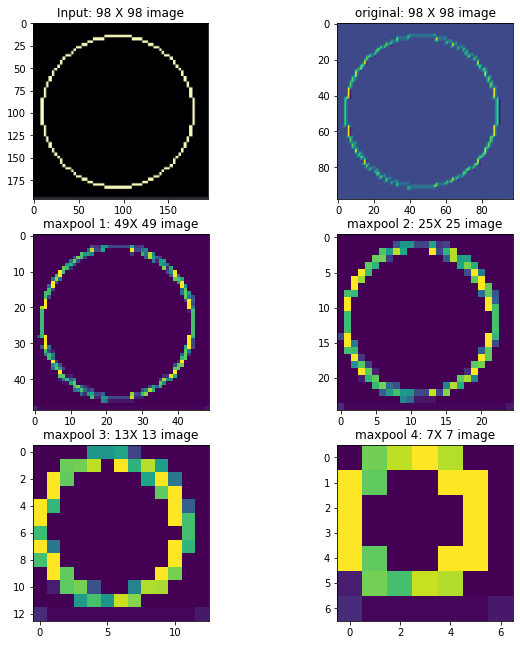

In [23]:
image_path = 'data/circle.png'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=3)
img= tf.image.convert_image_dtype(image, dtype=tf.float32)

img2 = tf.expand_dims(img, axis=0)
sobel=[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
edge_detect=[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
sharpen=[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
kernel= tf.constant(np.array([sobel,edge_detect,sharpen]),dtype='float32')
kernel
img2.shape
kernel= tf.reshape(kernel, [*kernel.shape,1])
kernel.shape
con_image= tf.nn.conv2d(input= img2,
            filters= kernel,
            strides=1,
             padding='SAME'
            )

i= con_image
images=[]
size=[]
for j in range(5):    
    i = tf.nn.pool(
        input=i,
        window_shape=(2, 2),
        pooling_type='MAX',
        strides=(2, 2),
        padding='SAME',
    )
    size.append(i.shape)
    images.append(i[0])
fig,ax= plt.subplots(nrows=3,ncols=2,figsize=(10,11))

ax[0][0].imshow(img2[0])
ax[0][0].title.set_text('Input: {} X {} image'.format(tf.squeeze(size[0][1:3]).numpy()[0],tf.squeeze(size[0][1:3]).numpy()[1]))

ax[0][1].imshow(images[0])
ax[0][1].title.set_text('original: {} X {} image'.format(tf.squeeze(size[0][1:3]).numpy()[0],tf.squeeze(size[0][1:3]).numpy()[1]))

ax[1][0].imshow(images[1])
ax[1][0].title.set_text('maxpool 1: {}X {} image'.format(tf.squeeze(size[1][1:3]).numpy()[0],tf.squeeze(size[1][1:3]).numpy()[1]))

ax[1][1].imshow(images[2])
ax[1][1].title.set_text('maxpool 2: {}X {} image'.format(tf.squeeze(size[2][1:3]).numpy()[0],tf.squeeze(size[2][1:3]).numpy()[1]))

ax[2][0].imshow(images[3])
ax[2][0].title.set_text('maxpool 3: {}X {} image'.format(tf.squeeze(size[3][1:3]).numpy()[0],tf.squeeze(size[3][1:3]).numpy()[1]))

ax[2][1].imshow(images[4])
ax[2][1].title.set_text('maxpool 4: {}X {} image'.format(tf.squeeze(size[4][1:3]).numpy()[0],tf.squeeze(size[4][1:3]).numpy()[1]))